# Najprostsza sieć neuronowa

https://pytorch.org/

## Problem binarnej klasyfikacji liniowo separowalny

### Przygotowanie zbioru testowego

In [1]:
import numpy as np
import pandas as pd
import random

X = np.random.randn(1000)
Y = np.random.randn(1000)

L = [0 if x+y < 0 else 1 for x, y in zip(X, Y)]
L[:10]

for n in range(len(X)):
  if X[n]+Y[n] < 0:
    X[n] -= random.uniform(0.2, 0.8)
    Y[n] -= random.uniform(0.2, 0.8)
  else:
    X[n] += random.uniform(0.2, 0.8)
    Y[n] += random.uniform(0.2, 0.8)


df = pd.DataFrame({"x": X, "y": Y, "label": L})
df.head()

,x,y,label
0,-0.720804,-1.479923,0
1,-1.199504,-1.615509,0
2,-1.173746,-2.141428,0
3,-2.076841,-0.904416,0
4,0.658087,1.779458,1


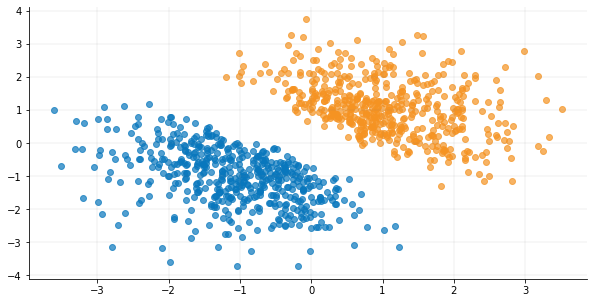

In [2]:
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

def scatterplot(x, y, category):
  fig, ax = plt.subplots(figsize=(10, 5))
  colors = ['#0877BD', '#F59322', '#BDDAF2', '#F7CD9C']

  for i in range(len(x)):
    ax.scatter(x[i], y[i], alpha=0.70, cmap=cm.brg, color=colors[category[i]])
 
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
  plt.show()

scatterplot(df['x'], df['y'], df['label'])

In [3]:
from sklearn.model_selection import train_test_split
import torch

X = df.drop(['label'], axis=1).values
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train))
print(len(X_test))

800
200


### Sieć neuronowa

In [5]:
import torch
import torch.nn as nn

In [6]:
class SingleLayer(nn.Module):

  def __init__(self):
    super().__init__()
    self.layer = nn.Linear(in_features=2, out_features=2)
 
  def forward(self, x):
    x = self.layer(x)
    return x

model = SingleLayer()
print(model)

SingleLayer(
  (layer): Linear(in_features=2, out_features=2, bias=True)
)


In [7]:
X_train_ft = torch.FloatTensor(X_train)
X_test_ft = torch.FloatTensor(X_test)
y_train_ft = torch.LongTensor(y_train)
y_test_ft = torch.LongTensor(y_test)

print(X_train_ft.size())
print(X_test_ft.size())
print(y_train_ft.size())
print(y_test_ft.size())

torch.Size([800, 2])
torch.Size([200, 2])
torch.Size([800])
torch.Size([200])


In [8]:
def train_model(model, X_train_ft, y_train_ft):
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

  epochs = 400
  loss_arr = []
  for i in range(epochs):
    y_hat = model.forward(X_train_ft)
    loss = criterion(y_hat, y_train_ft)
    loss_arr.append(loss)
  
    if i % 100 == 0:
        print(f'Epoch: {i} Loss: {loss}')
  
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


train_model(model, X_train_ft, y_train_ft)

Epoch: 0 Loss: 1.3341894149780273
Epoch: 100 Loss: 0.18432854115962982
Epoch: 200 Loss: 0.08401170372962952
Epoch: 300 Loss: 0.052256155759096146


In [9]:
def evaluate_model(model, X_test_ft, y_test):
  preds = []
  with torch.no_grad():
    for val in X_test_ft:
        y_hat = model.forward(val)
        preds.append(y_hat.argmax().item())

  df = pd.DataFrame({'label': y_test, 'prediction': preds})
  df['correct'] = [1 if corr == pred else 0 for corr, pred in zip(df['label'], df['prediction'])]
  
  return df['correct'].sum()/len(y_test)


evaluate_model(model, X_test_ft, y_test)

1.0

## Problem binarnej klasyfikacji liniowo nieseparowalny

### Zbiór danych

In [10]:
X2 = np.random.randn(1000)
Y2 = np.random.randn(1000)

L2 = [0 if x * y < 0 else 1 for x, y in zip(X2, Y2)]
L2[:10]

for n in range(len(X)):
  if X2[n] < 0:
    X2[n] -= random.uniform(0.2, 0.8)
  else:
    X2[n] += random.uniform(0.2, 0.8)
  if Y2[n] < 0:
    Y2[n] -= random.uniform(0.2, 0.8)
  else:
    Y2[n] += random.uniform(0.2, 0.8)


df2 = pd.DataFrame({"x": X2, "y": Y2, "label": L2})
df2.head()

,x,y,label
0,0.942346,2.102604,1
1,-2.205180,-1.449433,1
2,-1.310934,-0.624830,1
3,0.680631,1.749734,1
4,-1.090024,1.630357,0


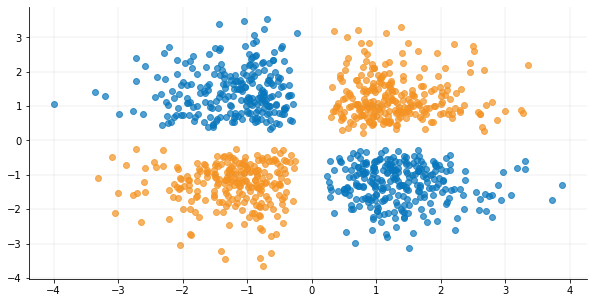

In [11]:
scatterplot(df2['x'], df2['y'], df2['label'])

In [12]:
X2_train, X2_test, y2_train, y2_test = \
  train_test_split(df2.drop(['label'], axis=1).values, df2['label'].values, test_size=0.2, random_state=42)

print(len(X2_train))
print(len(X2_test))

800
200


### Sieć neuronowa

In [13]:
X2_train_ft = torch.FloatTensor(X2_train)
X2_test_ft = torch.FloatTensor(X2_test)
y2_train_ft = torch.LongTensor(y2_train)
y2_test_ft = torch.LongTensor(y2_test)

In [14]:
model2 = SingleLayer()

train_model(model2, X2_train_ft, y2_train_ft)

Epoch: 0 Loss: 0.7532496452331543
Epoch: 100 Loss: 0.6925508379936218
Epoch: 200 Loss: 0.6925501823425293
Epoch: 300 Loss: 0.6925504207611084


In [15]:
evaluate_model(model, X2_test_ft, y2_test_ft)

0.455

In [16]:
class TwoLayerLinearNN(nn.Module):

  def __init__(self):
    super().__init__()
    self.hidden = nn.Linear(in_features=2, out_features=8)
    self.output = nn.Linear(in_features=8, out_features=2)
 
  def forward(self, x):
    x = self.hidden(x)
    x = self.output(x)
    return x


model2_linear = TwoLayerLinearNN()
train_model(model2_linear, X2_train_ft, y2_train_ft)
evaluate_model(model2_linear, X2_test_ft, y2_test_ft)

Epoch: 0 Loss: 0.7254477143287659
Epoch: 100 Loss: 0.6925506591796875
Epoch: 200 Loss: 0.6925503611564636
Epoch: 300 Loss: 0.6925503611564636


0.59

In [17]:
class TwoLayerSigmoidNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden = nn.Linear(in_features=2, out_features=8)
    self.output = nn.Linear(in_features=8, out_features=2)
 
  def forward(self, x):
    x = torch.sigmoid(self.hidden(x))
    x = torch.sigmoid(self.output(x))
    return x


model2_sigmoid = TwoLayerSigmoidNN()
train_model(model2_sigmoid, X2_train_ft, y2_train_ft)
evaluate_model(model2_sigmoid, X2_test_ft, y2_test_ft)

Epoch: 0 Loss: 0.6944980621337891
Epoch: 100 Loss: 0.590885579586029
Epoch: 200 Loss: 0.44262927770614624
Epoch: 300 Loss: 0.37101981043815613


0.99

### Wizualizacja przestrzeni

In [18]:
Xs = []
Ys = []

for x in np.arange(-5, 4, 0.05):
  for y in np.arange(-5, 4, 0.05):
    Xs.append(x)
    Ys.append(y)

print(len(Xs))

32400


In [19]:
sdf_ft = torch.FloatTensor([t for t in zip(Xs, Ys)])

Ls = []
with torch.no_grad():
  for val in sdf_ft:
      y_hat = model2_sigmoid.forward(val)
      Ls.append(y_hat.argmax().item())

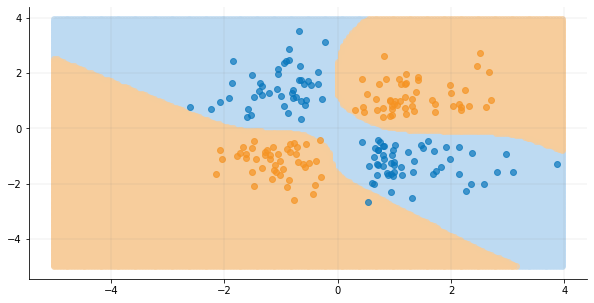

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))
colors = ['#0877BD', '#F59322', '#BDDAF2', '#F7CD9C']
  
def pp(V, L, val):
  return [V[i] for i in range(len(V)) if L[i] == val]

# Obszary klasy
ax.scatter(pp(Xs, Ls, 0), pp(Ys, Ls, 0), alpha=0.70, cmap=cm.brg, color=colors[2])
ax.scatter(pp(Xs, Ls, 1), pp(Ys, Ls, 1), alpha=0.70, cmap=cm.brg, color=colors[3])

# Dane testowe
ax.scatter(pp(X2_test[:,0], y2_test, 0), pp(X2_test[:,1], y2_test, 0), alpha=0.70, cmap=cm.brg, color=colors[0]) 
ax.scatter(pp(X2_test[:,0], y2_test, 1), pp(X2_test[:,1], y2_test, 1), alpha=0.70, cmap=cm.brg, color=colors[1]) 

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()